In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
test = pd.read_excel("../../results/translated-context/crazy.xlsx", engine="openpyxl")
test.columns

Index(['Unnamed: 0', 'mean_sentence_count', 'median_sentence_count',
       'std_sentence_count', 'mean_avg_sentence_length',
       'median_avg_sentence_length', 'std_avg_sentence_length',
       'mean_avg_syllables_per_word', 'median_avg_syllables_per_word',
       'std_avg_syllables_per_word', 'mean_flesch_reading_ease_de',
       'median_flesch_reading_ease_de', 'std_flesch_reading_ease_de',
       'mean_flesch_kincaid_grade_level_de',
       'median_flesch_kincaid_grade_level_de',
       'std_flesch_kincaid_grade_level_de', 'mean_wstf1', 'median_wstf1',
       'std_wstf1', 'mean_wstf2', 'median_wstf2', 'std_wstf2', 'mean_wstf3',
       'median_wstf3', 'std_wstf3', 'mean_wstf4', 'median_wstf4', 'std_wstf4',
       'idk_count', 'total_answers_before', 'total_answers_after', 'mean_BLEU',
       'median_BLEU', 'std_BLEU', 'mean_BERT_Precision',
       'median_BERT_Precision', 'std_BERT_Precision', 'mean_BERT_Recall',
       'median_BERT_Recall', 'std_BERT_Recall', 'mean_BERT_F1',
    

In [63]:
# Load all DataFrames and add source labels
dataframes = {''
    "nonsense": pd.read_excel("../../results/translated-context/crazy.xlsx", engine="openpyxl"),
    "plain-de": pd.read_excel("../../results/translated-context/simple.xlsx", engine="openpyxl"),
    "easy_de": pd.read_excel("../../results/translated-context/easy.xlsx", engine="openpyxl"),
    "rules": pd.read_excel("../../results/translated-context/rules.xlsx", engine="openpyxl"),
    "example_text": pd.read_excel("../../results/translated-context/example-text.xlsx", engine="openpyxl"),
    "rules_example": pd.read_excel("../../results/translated-context/rules-example.xlsx", engine="openpyxl"),
    "five_shot": pd.read_excel("../../results/translated-context/five-shot.xlsx", engine="openpyxl"),
    "aligned_translation": pd.read_excel("../../results/translated-context/three-shot-aligned.xlsx", engine="openpyxl"),
    "translation": pd.read_excel("../../results/translated-context/three-shot-plain.xlsx", engine="openpyxl"),
}

# Add source column to each DataFrame and combine
for name, df in dataframes.items():
    df['Source'] = name  # Label the DataFrame source

# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

/tmp/ipykernel_29596/4025532444.py:53: UserWarning: Mismatched number of handles and labels: len(handles) = 7 len(labels) = 6
  plt.legend(handles=handles, labels=mapped_labels, title='Model', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)


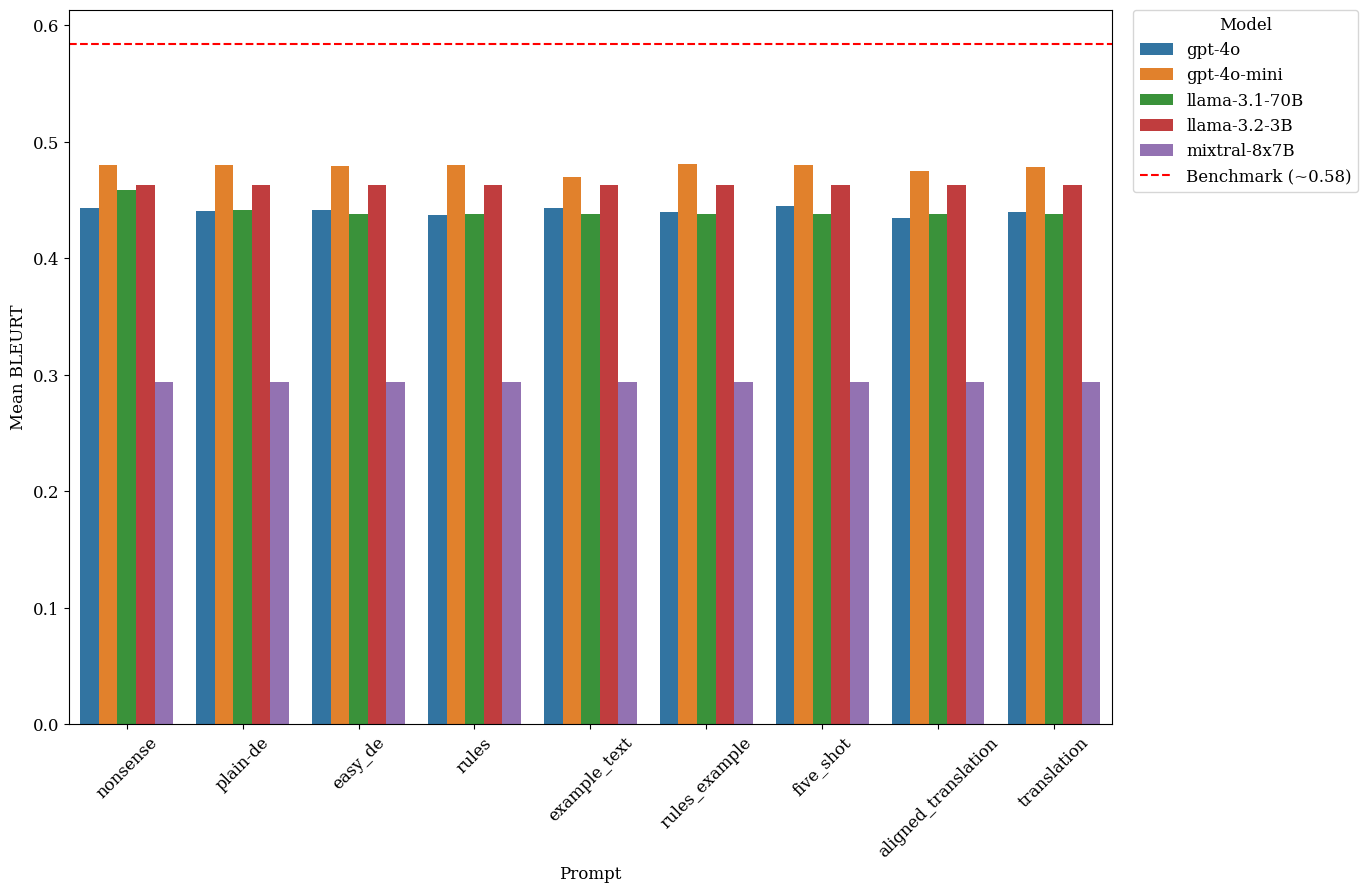

In [65]:
# Melt the combined dataframe for the specific metrics
df_melted = combined_df.melt(
    id_vars=['Unnamed: 0', 'Source'],  # Keep model and source as identifiers
    value_vars=['mean_BLEURT'],  # Metrics to plot
    var_name='Metric', 
    value_name='Value'
)

# Set global font using rcParams
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Define a custom palette with five colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Replace with your preferred colors

# Define the desired order of models for the legend
model_order = ['GPT', 'GPT Mini', 'Llama 70B', 'Llama 3B', 'Mixtral 8x7B']  # Adjust to the models you want and in the desired order

# Plot using seaborn with error bars (Barplot with mean and std)
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_melted, 
    x='Source', 
    y='Value', 
    hue='Unnamed: 0',
    palette=custom_palette,
    hue_order=model_order,
    errorbar='sd'  # Use errorbar='sd' for standard deviation as error bars
)

# Add a dashed horizontal line as a benchmark
benchmark_value = 0.584339 # Replace this with your desired benchmark value
plt.axhline(y=benchmark_value, color='red', linestyle='--', linewidth=1.5, label='Benchmark')

# Customize the plot
plt.xlabel('Prompt', fontsize=12)
plt.ylabel('Mean BLEURT', fontsize=12)

# Adjust legend position to avoid overlap
new_labels = ['gpt-4o', 'gpt-4o-mini', 'llama-3.1-70B', 'llama-3.2-3B', 'mixtral-8x7B']  # Modify this list as needed
handles, labels = ax.get_legend_handles_labels()
label_dict = dict(zip(labels, new_labels))  # Map old labels to new labels
mapped_labels = [label_dict[label] for label in labels if label in label_dict]

# Add benchmark handle and label manually
benchmark_handle = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1.5)
handles.append(benchmark_handle)
mapped_labels.append('Benchmark (~0.58)')

# Set the new labels to the legend
plt.legend(handles=handles, labels=mapped_labels, title='Model', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Adjust layout to create space for legend
plt.tight_layout()
plt.subplots_adjust(right=0.8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
